# 👋Hello, this notebook shows how to convert 1) a single smile string, or 2) Several smiles strings as batch, or 3) a whole lot of smiles strings downloaded from Chembl database, to SDF file format.

In [ ]:
#@title Install Conda Rdkit and Open Babel
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')
!time conda install -q -y -c openbabel openbabel
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

# 1）Convert a single SMILE string

Single smile conversion

In [49]:
!obabel -:"O=C1N=C(N2CCN(C(C=C)=O)C[C@@H]2C)C3=CC(F)=C(C4=C(O)C=CC=C4F)N=C3[N@@]1[C@@]5=C(C)C=CN=C5C(C)C" -osdf -O AMG510.sdf --gen3d

*** Open Babel Warning  in ParseSmiles
  Ignoring stereochemistry. Not enough connections to this atom. 
*** Open Babel Warning  in ParseSmiles
  Ignoring stereochemistry. Not enough connections to this atom. 
1 molecule converted


# 2）Batch smiles conversion. There are two lines of smiles inside "example.smi".

In [50]:
!echo "O=C1N=C(N2CCN(C(C=C)=O)C[C@@H]2C)C3=CC(F)=C(C4=C(O)C=CC=C4F)N=C3[N@@]1[C@@]5=C(C)C=CN=C5C(C)C" > example.smi

In [51]:
!echo "O=C1N=C(N2CCN(C(C=C)=O)C[C@@H]2C)C3=CC(F)=C(C4=C(O)C=CC=C4F)N=C3[N@@]1[C@@]5=C(C)C=CN=C5C(C)C" >> example.smi

In [48]:
!obabel example.smi -osdf -O example.sdf --gen3d

*** Open Babel Error  in OpenAndSetFormat
  Cannot open example.smi
0 molecules converted


#3） Convert a whole lot of SMILES downloaed from Chembl database, starting from a CSV file.

In [8]:
import pandas as pd

#⚠️⚠️👋Delete the missing pIC50 ROW as well as unnecessary coloumns except ID, Smiles and pIC05, using a MAC numbers software before submitting 1.csv to google colab

In [ ]:
df = pd.read_csv('1.csv')
df

In [101]:
#df1.to_csv('3.csv', index=False)

# Grab out pIC50 as a CSV that will be used to combine with SDF derived smile data frame later, pay attention to the length of your data frame.

In [102]:
!awk -F "\"*,\"*" '{print $3}' 1.csv > pIC50.csv

**⚠️⚠️ NOTE， make sure you mannually delete the first row that is not pIC50 numbers, i.e., delete the title "pChembl" or something like that.Otherwise, it will cause a mismatch problem later.**

In [ ]:
pIC50 = pd.read_csv('pIC50.csv')
pIC50

# Grab out SMILES and convert to a SDF with Obabel

In [114]:
!awk -F "\"*,\"*" '{print $2}' 1.csv > smile.smi

**⚠️⚠️NOTE, make sure you manually delete the first one or two rows that are not SMILES strings, make sure there are only pure SMILES, in a each one per row manner**

In [115]:
#@title Based on your file length, this could take a while
!obabel smile.smi -osdf -O smile.sdf --gen3d

415 molecules converted


# Use RDKIT to read SDF file to a Data Frame

In [116]:
from rdkit.Chem import PandasTools

In [117]:
SDFFile = "smile.sdf"
df1 = PandasTools.LoadSDF(SDFFile)

In [ ]:
df1

# Combine two Data Frame

,ID,ROMol,pChEMBL Value
0,,,7.16
1,,,6.61
2,,,6.80
3,,,6.17
4,,,7.54
...,...,...,...
410,,,7.14
411,,,6.91
412,,,7.44
413,,,7.26

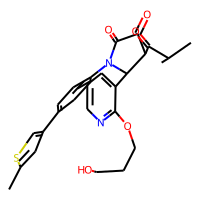
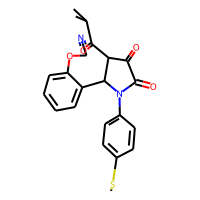
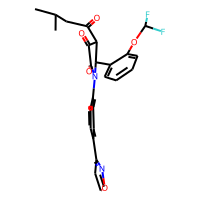
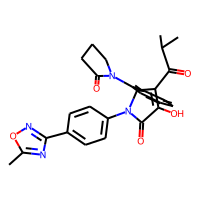
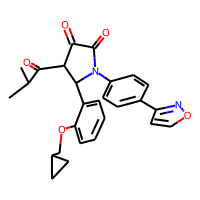
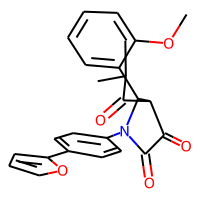
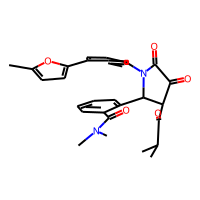
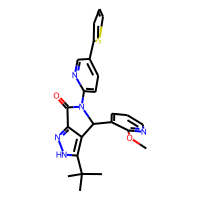
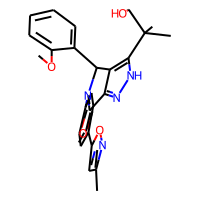
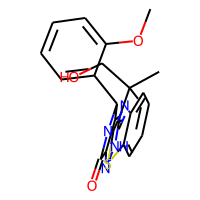

In [128]:
combined = pd.concat([df1, pIC50], axis=1)
combined

In [ ]:
⚠️⚠️ Please double check there is no mismatch issue after merging the two data frames.